In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


In [165]:
exams = pd.read_csv("exams.csv") #AP exam scores from 2016. Source = College Board via kaggle

In [166]:
exams.head(10)

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,897.00,1260.00,815.00,1889.00,1631.00,34,321.00,514.00,5,5,154.00,2704.00
1,ART HISTORY,4,1835.00,2608.00,1800.00,3787.00,3290.00,132,918.00,877.00,13,8,273.00,5587.00
2,ART HISTORY,3,2311.00,3282.00,2283.00,4657.00,3898.00,287,1347.00,992.00,19,10,307.00,6940.00
3,ART HISTORY,2,2252.00,3248.00,2374.00,4494.00,3211.00,450,1972.00,809.00,15,21,280.00,6868.00
4,ART HISTORY,1,901.00,1352.00,1072.00,1699.00,942.00,307,1074.00,292.00,13,10,87.00,2771.00
5,ART HISTORY,All,8196.00,11750.00,8344.00,16526.00,12972.00,1210,5632.00,3484.00,65,54,1101.00,24870.00
6,ART HISTORY,Average,2.95,2.93,2.87,2.98,3.11,2.29,2.55,3.15,2.72,2.57,3.12,2.94
7,BIOLOGY,5,5769.00,6396.00,8118.00,6776.00,8585.00,153,788.00,4443.00,11,7,733.00,14894.00
8,BIOLOGY,4,18585.00,21195.00,22244.00,25943.00,29999.00,976,3966.00,10367.00,75,49,2139.00,48187.00
9,BIOLOGY,3,30119.00,34631.00,30786.00,47150.00,46377.00,3305,10511.00,13051.00,183,97,3477.00,77936.00


In [167]:
exams.columns

Index(['Exam Subject', 'Score', 'Students (11th Grade)',
       'Students (12th Grade)', 'Students (Male)', 'Students (Female)',
       'Students (White)', 'Students (Black)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)',
       'Students (Two or More Races)', 'All Students (2016)'],
      dtype='object')

In [168]:
exams.dtypes

Exam Subject                                    object
Score                                           object
Students (11th Grade)                          float64
Students (12th Grade)                          float64
Students (Male)                                float64
Students (Female)                              float64
Students (White)                               float64
Students (Black)                                object
Students (Hispanic/Latino)                     float64
Students (Asian)                               float64
Students (American Indian/Alaska Native)        object
Students (Native Hawaiian/Pacific Islander)     object
Students (Two or More Races)                   float64
All Students (2016)                            float64
dtype: object

In [169]:
#the dataframe initially had numbers stored as objects for three of the columns
#changing the type to a float

exams["Students (Black)"] = pd.to_numeric(exams["Students (Black)"], errors="coerce")
exams["Students (American Indian/Alaska Native)"] = pd.to_numeric(exams["Students (American Indian/Alaska Native)"], errors="coerce")
exams["Students (Native Hawaiian/Pacific Islander)"] = pd.to_numeric(exams["Students (Native Hawaiian/Pacific Islander)"], errors="coerce")

In [170]:
exams.dtypes

Exam Subject                                    object
Score                                           object
Students (11th Grade)                          float64
Students (12th Grade)                          float64
Students (Male)                                float64
Students (Female)                              float64
Students (White)                               float64
Students (Black)                               float64
Students (Hispanic/Latino)                     float64
Students (Asian)                               float64
Students (American Indian/Alaska Native)       float64
Students (Native Hawaiian/Pacific Islander)    float64
Students (Two or More Races)                   float64
All Students (2016)                            float64
dtype: object

In [171]:
exams["Exam Subject"].unique()

array(['ART HISTORY', 'BIOLOGY', 'CALCULUS AB', 'CALCULUS BC',
       'CHEMISTRY', 'CHINESE LANGUAGE & CULTURE', 'COMPUTER SCIENCE A',
       'MACROECONOMICS', 'MICROECONOMICS',
       'ENGLISH LANGUAGE & COMPOSITION',
       'ENGLISH LITERATURE & COMPOSITION', 'ENVIRONMENTAL SCIENCE',
       'EUROPEAN HISTORY', 'FRENCH LANGUAGE & CULTURE',
       'GERMAN LANGUAGE & CULTURE', 'GOVERNMENT & POLITICS: COMPARATIVE',
       'GOVERNMENT & POLITICS: U.S.', 'HUMAN GEOGRAPHY',
       'ITALIAN LANGUAGE & CULTURE', 'JAPANESE LANGUAGE & CULTURE',
       'LATIN ', 'MUSIC THEORY', 'PHYSICS C: ELECTRICITY & MAGNETISM',
       'PHYSICS C: MECHANICS', 'PHYSICS 1', 'PHYSICS 2', 'PSYCHOLOGY',
       'RESEARCH', 'SEMINAR', 'SPANISH LANGUAGE', 'SPANISH LITERATURE',
       'STATISTICS', 'STUDIO ART: DRAWING', 'STUDIO ART: 2-D DESIGN',
       'STUDIO ART: 3-D DESIGN', 'U.S. HISTORY', 'WORLD HISTORY'],
      dtype=object)

Text(0,0.5,'Number of Students')

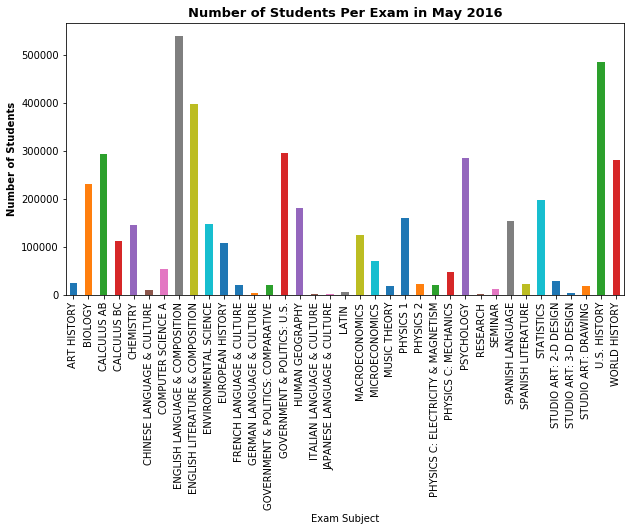

In [204]:
plt.figure(figsize = (10,5))
exams[exams["Score"] == "All"].groupby(["Exam Subject"])["All Students (2016)"].sum().plot(kind="bar")
plt.title("Number of Students Per Exam in May 2016", fontsize = 13, weight="bold")
plt.ylabel("Number of Students", weight="bold")


In [172]:
# adding columns to the dataframe that show the percent of each race's representation for each score (1 through 5)

exams["Students (Hispanic/Latino) Fraction"] = exams["Students (Hispanic/Latino)"] / exams["All Students (2016)"]
exams["Students (Black) Fraction"] = exams["Students (Black)"] / exams["All Students (2016)"]
exams["Students (Asian) Fraction"] = exams["Students (Asian)"] / exams["All Students (2016)"]
exams["Students (White) Fraction"] = exams["Students (White)"] / exams["All Students (2016)"]
exams["Students (Other) Fraction"] = (exams["Students (American Indian/Alaska Native)"] + exams["Students (Native Hawaiian/Pacific Islander)"] + exams["Students (Two or More Races)"]) / exams["All Students (2016)"]

In [173]:
exams.head()

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
0,ART HISTORY,5,897.0,1260.0,815.0,1889.0,1631.0,34.0,321.0,514.0,5.0,5.0,154.0,2704.0,0.118713,0.012574,0.190089,0.603180,0.060651
1,ART HISTORY,4,1835.0,2608.0,1800.0,3787.0,3290.0,132.0,918.0,877.0,13.0,8.0,273.0,5587.0,0.164310,0.023626,0.156972,0.588867,0.052622
2,ART HISTORY,3,2311.0,3282.0,2283.0,4657.0,3898.0,287.0,1347.0,992.0,19.0,10.0,307.0,6940.0,0.194092,0.041354,0.142939,0.561671,0.048415
3,ART HISTORY,2,2252.0,3248.0,2374.0,4494.0,3211.0,450.0,1972.0,809.0,15.0,21.0,280.0,6868.0,0.287129,0.065521,0.117793,0.467531,0.046010
4,ART HISTORY,1,901.0,1352.0,1072.0,1699.0,942.0,307.0,1074.0,292.0,13.0,10.0,87.0,2771.0,0.387586,0.110790,0.105377,0.339949,0.039697


In [174]:
#pulling just the AP English Literature & Composition data
ap_lit = exams[exams["Exam Subject"] == "ENGLISH LITERATURE & COMPOSITION"]

In [175]:
ap_lit.head(10)

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
70,ENGLISH LITERATURE & COMPOSITION,5,3428.00,25321.00,9723.0,19402.00,18906.00,516.0,2371.00,5476.0,33.00,22.00,1472.00,29125.00,0.081408,0.017717,0.188017,0.649133,0.052429
71,ENGLISH LITERATURE & COMPOSITION,4,8032.00,61378.00,25086.0,45300.00,46948.00,2063.0,7740.00,9692.0,120.00,61.00,3081.00,70386.00,0.109965,0.029310,0.137698,0.667008,0.046344
72,ENGLISH LITERATURE & COMPOSITION,3,14192.00,100653.00,43479.0,73374.00,73232.00,5882.0,18682.00,12405.0,276.00,169.00,4981.00,116853.00,0.159876,0.050337,0.106159,0.626702,0.046434
73,ENGLISH LITERATURE & COMPOSITION,2,18035.00,112113.00,49228.0,83999.00,63309.00,13838.0,36649.00,11391.0,602.00,301.00,5530.00,133227.00,0.275087,0.103868,0.085501,0.475196,0.048286
74,ENGLISH LITERATURE & COMPOSITION,1,4948.00,41789.00,20079.0,28035.00,11719.00,11697.0,19090.00,2638.0,298.00,126.00,1613.00,48114.00,0.396766,0.243110,0.054828,0.243567,0.042337
75,ENGLISH LITERATURE & COMPOSITION,All,48635.00,341254.00,147595.0,250110.00,214114.00,33996.0,84532.00,41602.0,1329.00,679.00,16677.00,397705.00,0.212550,0.085480,0.104605,0.538374,0.046982
76,ENGLISH LITERATURE & COMPOSITION,Average,2.73,2.75,2.7,2.78,2.99,2.0,2.26,3.1,2.24,2.34,2.84,2.75,0.821818,0.727273,1.127273,1.087273,2.698182


In [176]:
ap_lit.index = ["5", "4", "3", "2", "1", "All", "Average"]

In [177]:
ap_lit.head(6)

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016),Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
5,ENGLISH LITERATURE & COMPOSITION,5,3428.0,25321.0,9723.0,19402.0,18906.0,516.0,2371.0,5476.0,33.0,22.0,1472.0,29125.0,0.081408,0.017717,0.188017,0.649133,0.052429
4,ENGLISH LITERATURE & COMPOSITION,4,8032.0,61378.0,25086.0,45300.0,46948.0,2063.0,7740.0,9692.0,120.0,61.0,3081.0,70386.0,0.109965,0.029310,0.137698,0.667008,0.046344
3,ENGLISH LITERATURE & COMPOSITION,3,14192.0,100653.0,43479.0,73374.0,73232.0,5882.0,18682.0,12405.0,276.0,169.0,4981.0,116853.0,0.159876,0.050337,0.106159,0.626702,0.046434
2,ENGLISH LITERATURE & COMPOSITION,2,18035.0,112113.0,49228.0,83999.0,63309.0,13838.0,36649.0,11391.0,602.0,301.0,5530.0,133227.0,0.275087,0.103868,0.085501,0.475196,0.048286
1,ENGLISH LITERATURE & COMPOSITION,1,4948.0,41789.0,20079.0,28035.0,11719.0,11697.0,19090.0,2638.0,298.0,126.0,1613.0,48114.0,0.396766,0.243110,0.054828,0.243567,0.042337
All,ENGLISH LITERATURE & COMPOSITION,All,48635.0,341254.0,147595.0,250110.0,214114.0,33996.0,84532.0,41602.0,1329.0,679.0,16677.0,397705.0,0.212550,0.085480,0.104605,0.538374,0.046982


In [178]:
ap_lit_demographics = ap_lit.iloc[0:5, -5:]

In [179]:
ap_lit_demographics.head(5)

,Students (Hispanic/Latino) Fraction,Students (Black) Fraction,Students (Asian) Fraction,Students (White) Fraction,Students (Other) Fraction
5,0.081408,0.017717,0.188017,0.649133,0.052429
4,0.109965,0.029310,0.137698,0.667008,0.046344
3,0.159876,0.050337,0.106159,0.626702,0.046434
2,0.275087,0.103868,0.085501,0.475196,0.048286
1,0.396766,0.243110,0.054828,0.243567,0.042337


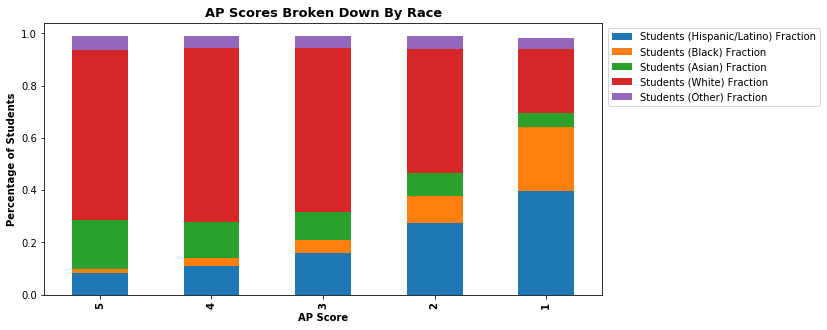

In [180]:
#creating a stacked bar chart, where every bar should equal a number very close to 1.0 
#in order to show the over- and under-representation of Black and Latino students versus that of White students

ap_lit_demographics.plot(kind="bar", stacked=True, figsize= (10,5))
plt.ylabel("Percentage of Students", weight="bold")
plt.xlabel("AP Score", weight="bold")
plt.title("AP Scores Broken Down By Race", fontsize=13, weight = "bold")
plt.xticks(weight="bold")
plt.legend(loc = "upper right", bbox_to_anchor=(.9, 0, .5, 1))


**Caption**: In this bar chart, every bar represents a score between 1 and 5 and has a height of 1.0 (100% of the population. Each bar is broken down by race. Here, it's clear that White students (shown in the color red) make up roughly 65% of students who score a 5 and about 25% of students who score a 1. Those numbers are inverted for Black and Latino students, where they make up a mere 10% of students who score a 5 and 65% of students who score a 1.

In [181]:
#creating an empty dataframe, where I can capture baseline data by racial demographic

key_metric_baseline = pd.DataFrame()

In [182]:
key_metric_baseline["Score"] = [5, 4, 3, 2, 1]

key_metric_baseline.head()

,Score
0,5
1,4
2,3
3,2
4,1


In [183]:
#populating the empty dataframe with the data that shows what percentage of ALL Black/Latino/White students tested scored a 5, 4, etc.

key_metric_baseline["Percent of All Tested Black Students"] = [((ap_lit.iloc[0, 7]) / ap_lit.iloc[5, 7]), 
                                                               (ap_lit.iloc[1, 7] / ap_lit.iloc[5, 7]), 
                                                               (ap_lit.iloc[2, 7] / ap_lit.iloc[5, 7]),
                                                               (ap_lit.iloc[3, 7] / ap_lit.iloc[5, 7]),
                                                               (ap_lit.iloc[4, 7] / ap_lit.iloc[5, 7])]

key_metric_baseline["Percent of All Tested Latino Students"] = [((ap_lit.iloc[0, 8]) / ap_lit.iloc[5, 8]), 
                                                               (ap_lit.iloc[1, 8] / ap_lit.iloc[5, 8]), 
                                                               (ap_lit.iloc[2, 8] / ap_lit.iloc[5, 8]),
                                                               (ap_lit.iloc[3, 8] / ap_lit.iloc[5, 8]),
                                                               (ap_lit.iloc[4, 8] / ap_lit.iloc[5, 8])]

key_metric_baseline["Percent of All Tested White Students"] = [((ap_lit.iloc[0, 6]) / ap_lit.iloc[5, 6]), 
                                                               (ap_lit.iloc[1, 6] / ap_lit.iloc[5, 6]), 
                                                               (ap_lit.iloc[2, 6] / ap_lit.iloc[5, 6]),
                                                               (ap_lit.iloc[3, 6] / ap_lit.iloc[5, 6]),
                                                               (ap_lit.iloc[4, 6] / ap_lit.iloc[5, 6])]



key_metric_baseline.head()

,Score,Percent of All Tested Black Students,Percent of All Tested Latino Students,Percent of All Tested White Students
0,5,0.015178,0.028049,0.088299
1,4,0.060684,0.091563,0.219266
2,3,0.173020,0.221005,0.342023
3,2,0.407048,0.433552,0.295679
4,1,0.344070,0.225832,0.054733


In [184]:
#calculating the standard deviation of the dataset that contains White, Black, and Latino scores in 2016

import statistics

test_scores = ([5, 5, 4, 4, 4, 4, 4, 4, 4 ,4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 
                2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
               1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] * 1185)
#516  2371   .02
#2063  7740   .08
#5882  18682   .21
#13838 36649   .43
#11697  19090  .26
#118528

statistics.stdev(test_scores)

0.9817267550517532

In [197]:
#testing out how different sample mean results would impact the t-test score

import math

y1 = .2947
y2 = .39
n1 = 200000
n2 = 200000
s1 = .98
s2 = .85

t = (y2 - y1)/math.sqrt((s1**2)/n1 + (s2**2)/n2)

print(t)

32.85328061880803


In [186]:
l_student_avg_score = ((key_metric_baseline.iloc[0,2] * ap_lit.iloc[5,8] * key_metric_baseline.iloc[0,0]) + (key_metric_baseline.iloc[1,2] * ap_lit.iloc[5,8] * key_metric_baseline.iloc[1,0]) + (key_metric_baseline.iloc[2,2] * ap_lit.iloc[5,8] * key_metric_baseline.iloc[2,0]) + (key_metric_baseline.iloc[3,2] * ap_lit.iloc[5,8] * key_metric_baseline.iloc[3,0]) + (key_metric_baseline.iloc[4,2] * ap_lit.iloc[5,8] * key_metric_baseline.iloc[4,0])) / ap_lit.iloc[5,8] 
b_student_avg_score = ((key_metric_baseline.iloc[0,1] * ap_lit.iloc[5,7] * key_metric_baseline.iloc[0,0]) + (key_metric_baseline.iloc[1,1] * ap_lit.iloc[5,7] * key_metric_baseline.iloc[1,0]) + (key_metric_baseline.iloc[2,1] * ap_lit.iloc[5,7] * key_metric_baseline.iloc[2,0]) + (key_metric_baseline.iloc[3,1] * ap_lit.iloc[5,7] * key_metric_baseline.iloc[3,0]) + (key_metric_baseline.iloc[4,1] * ap_lit.iloc[5,7] * key_metric_baseline.iloc[4,0])) / ap_lit.iloc[5,7] 
w_student_avg_score = ((key_metric_baseline.iloc[0,3] * ap_lit.iloc[5,6] * key_metric_baseline.iloc[0,0]) + (key_metric_baseline.iloc[1,3] * ap_lit.iloc[5,6] * key_metric_baseline.iloc[1,0]) + (key_metric_baseline.iloc[2,3] * ap_lit.iloc[5,6] * key_metric_baseline.iloc[2,0]) + (key_metric_baseline.iloc[3,3] * ap_lit.iloc[5,6] * key_metric_baseline.iloc[3,0]) + (key_metric_baseline.iloc[4,3] * ap_lit.iloc[5,6] * key_metric_baseline.iloc[4,0])) / ap_lit.iloc[5,6] 
b_l_student_combined_avg_score = (l_student_avg_score + b_student_avg_score) / 2
print("The average test score for Latino students is", l_student_avg_score)
print("The average test score for Black students is", b_student_avg_score)
print("The combined average test score for Black and Latino students is", b_l_student_combined_avg_score)
print("The average test score for White students is", w_student_avg_score)

The average test score for Latino students is 2.2624449912459186
The average test score for Black students is 1.9958524532297917
The combined average test score for Black and Latino students is 2.129148722237855
The average test score for White students is 2.9907198968773643


In [187]:
blacklatino_percent_college_credit = (key_metric_baseline.iloc[0,1] + key_metric_baseline.iloc[1,1] + key_metric_baseline.iloc[2, 1] + key_metric_baseline.iloc[0,2] + key_metric_baseline.iloc[1,2] + key_metric_baseline.iloc[2,2]) / 2
white_percent_college_credit = key_metric_baseline.iloc[0,3] + key_metric_baseline.iloc[1,3] + key_metric_baseline.iloc[2,3]

print("The percent of White students who earned college credit on the 2016 AP Literature and Composition exam was", 
      white_percent_college_credit,". Meanwhile, the percent of Black or Latino students who earned college credit was", blacklatino_percent_college_credit,".")

The percent of White students who earned college credit on the 2016 AP Literature and Composition exam was 0.6495885369476073 . Meanwhile, the percent of Black or Latino students who earned college credit was 0.29474939633855507 .


In [188]:
#found a dataset that included the Title, Author, Genre, and Date of texts that typically appear on the AP test, but not ethnicity (which was what I really wanted to look into)
#spent time researching (via google searches) to fill in the ethnicities/countries of origin for all 127 authors
 
ap_authors = pd.read_csv("AP Authors.csv", encoding = "ISO-8859-1")

In [189]:
ap_authors.head()

,Title,Author,Genre,Date,Ethnicity
0,Medea,Euripides,play,431 BC,Greek
1,The Odyssey,Homer,epic poem,(no date),Greek
2,Antigone,Sophocles,play,441 BC,Greek
3,Oedipus Rex,Sophocles,play,429 BC,Greek
4,Don Quixote,Miguel de Cervantes,novel,1605,Spanish


In [190]:
ap_authors["Ethnicity"].unique()

array(['Greek', 'Spanish', 'English', 'French', 'American', 'Russian',
       'Norwegian', 'Polish-English', 'African-American', 'Irish',
       'Nigerian', 'Native American', 'South African', 'Mexican-American',
       'Asian-American', 'Asian-Canadian', 'Canadian', 'Afghan-American',
       'Japanese-English', 'Indian'], dtype=object)

In [191]:
#writing a function to identify writers of color (WOC)

def WOC(c):
    if ("African American" in str(c["Ethnicity"])) or ("Asian-American" in str(c["Ethnicity"])) or ("Native American" in str(c["Ethnicity"])) or ("Afghan-American" in str(c["Ethnicity"])) or ("Mexican-American" in str(c["Ethnicity"])) or ("Indian" in str(c["Ethnicity"])) or ("Spanish" in str(c["Ethnicity"])) or ("Nigerian" in str(c["Ethnicity"])) or ("Asian-Canadian" in str(c["Ethnicity"])) or ("Japanese-English" in str(c["Ethnicity"])):
        return 1
    else:
        return 0
    
ap_authors["Writer of Color"] = ap_authors.apply(WOC, axis=1)

In [192]:
ap_authors.head()

,Title,Author,Genre,Date,Ethnicity,Writer of Color
0,Medea,Euripides,play,431 BC,Greek,0
1,The Odyssey,Homer,epic poem,(no date),Greek,0
2,Antigone,Sophocles,play,441 BC,Greek,0
3,Oedipus Rex,Sophocles,play,429 BC,Greek,0
4,Don Quixote,Miguel de Cervantes,novel,1605,Spanish,1


In [193]:
ap_authors["Writer of Color"].value_counts()

0    109
1     18
Name: Writer of Color, dtype: int64

Text(0.5,1,'Ethnicities of Authors Typically on the AP Exam')

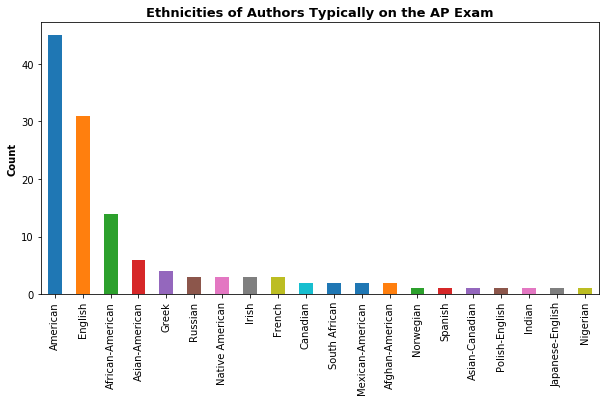

In [194]:
plt.figure(figsize = (10,5))
ap_authors["Ethnicity"].value_counts().plot(kind="bar")
plt.ylabel("Count", weight = "bold")
plt.title("Ethnicities of Authors Typically on the AP Exam", fontsize=13, weight="bold")


In [195]:
print("Out of the authors typically represented on the AP English Literature and Composition exam,", 
      (ap_authors["Writer of Color"].mean())*100, "percent of them are writers of color.")

Out of the authors typically represented on the AP English Literature and Composition exam, 14.173228346456693 percent of them are writers of color.


## The Problem  
Currently, Black and Latino students are performing poorly on the AP English Literature and Composition test. They are significantly underrepresented in the population that scores a 3, 4, or 5 on the test and significantly overrepresented in the population that scores a 1 or a 2. Typically, only students who score a 3 and higher on the test will earn college credit. When looking at the 2016 AP exam data, 31% of Black and Latino students scored a 3 or higher, as compared to White students, of which, 63% scored a 3 or higher.

## The Potential Solution  
My hypothesis is that Black and Latino students would perform better on this particular exam if the authors included on the test were more often writers of color (as opposed to white writers, typically of European descent). This would lead to a stronger, more accurate demonstration of their mastery of the skills/content assessed, which would result in higher test scores for Black and Latino students. 

## The Method of Testing the Solution  
+ By May 2019, the Development Committee (the group traditionally charged with writing AP exams) will write the standard AP Literature and Composition exam for the year. This will be considered "Version A."
+ Ask the Development Committee to write a second version of the AP Literature and Composition exam that includes a significant majority of writers of color - with the inclusion of 1-2 white writers. This will be "Version B" of the exam.
+ On the day of the exam, students will report to their testing locations as usual. 
+ Every other student will randomly be assigned Version A, while the other half of the students will be assigned Version B. 
    + In order to ensure that both samples have an even racial distribution...
        + every other White student will get Version A; the rest of the White students will get Version B
        + every other Black student will get Version A; the rest of the Black students will get Version B
        + every other Latino student will get Version A; the rest of the Latino students will get Version B
        + every other Asian student will get Version A; the rest of the Asian students will get Version B
        + every other students who falls into the "Other" category will get Version A; the rest will get version B
+ The variable of interest is the percent of Black and Latino students who score a 3, 4, or 5 on Version B of the AP Literature and Composition exam in May 2019 versus the percent of Black and Latino students who score a 3, 4, or 5 on Version A in May 2019. This is an A/B manipulation where two different versions of an exam are given to two similar samples of AP students. 
+ If the percent of Black and Latino students who score a 3, 4, or 5 is 10% higher for students who took Version B versus Version B, conclude that Black and Latino students do, in fact, perform at a higher level on a literature and writing test when writers of color make up the majority of the included texts. If the percent of Black and Latino students who score a 3, 4, or 5 is higher for students who took Version B versus Version A, but by less than 10%, continue the study the next May before deciding. If the percent of Black and Latino students who score a 3, 4, or 5 is not higher on Version B versus Version A, do not consider a shift to more writers of color on this AP exam. 